In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle

In [ ]:
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Load the datasets
train_df = pd.read_csv("KDDTrain+.txt", header=None)
test_df = pd.read_csv("KDDTest+.txt", header=None)


In [ ]:

# Define column names
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'label', 'score'
]
train_df.columns = test_df.columns = columns

# Encode categorical features
categorical_columns = ['protocol_type', 'service', 'flag']
encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])
    encoders[col] = encoder

# Convert labels to binary (1 = anomaly, 0 = normal)
y_train = train_df['label'].apply(lambda x: 1 if x != 'normal' else 0)
y_test = test_df['label'].apply(lambda x: 1 if x != 'normal' else 0)

# Drop non-feature columns
X_train = train_df.drop(columns=['label', 'score'])
X_test = test_df.drop(columns=['label', 'score'])

# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC
import pickle

# Train the model
svm_model = SVC(kernel='rbf', probability=True, C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Save the model
with open("svm_nsl_kdd_model.pkl", "wb") as file:
    pickle.dump(svm_model, file)
print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Load the saved model
with open("svm_nsl_kdd_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Make predictions
y_pred = loaded_model.predict(X_test)


Accuracy: 78.29%
Precision: 97.3292
Recall: 63.6094
F1 Score: 76.9369
Confusion Matrix:
 [[9487  224]
 [4670 8163]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.98      0.79      9711
           1       0.97      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544



Text(50.722222222222214, 0.5, 'Actual')

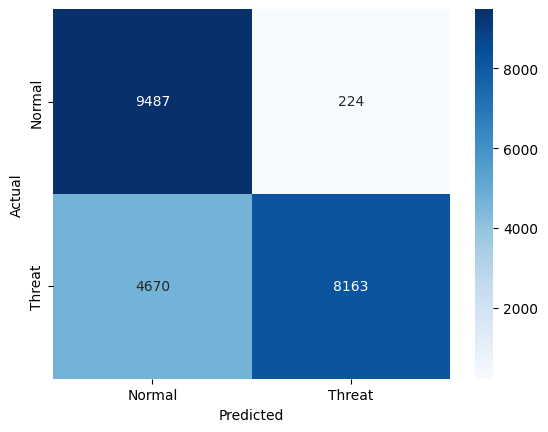

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score,precision_score, recall_score, f1_score
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)* 100:.4f}")
print(f"Recall: {recall_score(y_test, y_pred)* 100:.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred)* 100:.4f}")

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Threat"], yticklabels=["Normal", "Threat"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
